In [36]:


pip install opencv-python

     |████████████████████████████████| 55.7 MB 104 kB/s  eta 0:00:01   |█                               | 1.9 MB 5.3 MB/s eta 0:00:11     |████████▏                       | 14.1 MB 5.3 MB/s eta 0:00:08
Note: you may need to restart the kernel to use updated packages.


In [105]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib
from pathlib import Path

import tensorflow_hub as hub
import os
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from glob import glob
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [2]:
# verify TensorFlow version

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Version:  2.10.0
Eager mode:  True
Hub version:  0.16.0.dev
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is NOT AVAILABLE


In [254]:
import cv2


### Task 1:-Prepare a complete data analysis report on the given data.

### Finding Unique image sizes and classes in train data

In [284]:
i=-1
images=[]
classes = []
image_sizes = []
# Set the path to your dataset
dataset_path = '/Users/munawira/06-FEB_Python/projects/Rice_Leaf/Divided_Leaf_Data/Train'

# Iterate through each class directory
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)

    # Check if it's a directory
    if os.path.isdir(class_path):
        # Iterate through images in the class directory
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = cv2.imread(image_path)
            
            # Get the image size
            if image is not None:
                i=i+1
                image_size = image.shape[:2]  # Assuming (height, width, channels), so [:2] gives (height, width)
                # Print the image size and class name
                print(f"{i}. Image size: {image_size}, Class: {class_name}")
                (width, height) = image.shape[1], image.shape[0]
                image_sizes.append((width, height))
                classes.append(class_name)
                images.append(image)
            else:
                print(f"Error reading image: {image_path}")

# Return only unique shapes
unique_sizes = list(set(image_sizes))
unique_classes= list(set(classes))



0. Image size: (897, 3081), Class: Bacterial leaf blight
1. Image size: (897, 3081), Class: Bacterial leaf blight
2. Image size: (897, 3081), Class: Bacterial leaf blight
3. Image size: (897, 3081), Class: Bacterial leaf blight
4. Image size: (897, 3081), Class: Bacterial leaf blight
5. Image size: (897, 3081), Class: Bacterial leaf blight
Error reading image: /Users/munawira/06-FEB_Python/projects/Rice_Leaf/Divided_Leaf_Data/Train/Bacterial leaf blight/.DS_Store
6. Image size: (897, 3081), Class: Bacterial leaf blight
7. Image size: (897, 3081), Class: Bacterial leaf blight
8. Image size: (897, 3081), Class: Bacterial leaf blight
9. Image size: (897, 3081), Class: Bacterial leaf blight
10. Image size: (897, 3081), Class: Bacterial leaf blight
11. Image size: (897, 3081), Class: Bacterial leaf blight
12. Image size: (897, 3081), Class: Bacterial leaf blight
13. Image size: (897, 3081), Class: Bacterial leaf blight
14. Image size: (897, 3081), Class: Bacterial leaf blight
15. Image size

In [285]:
# x and y are the array of train images and classes respectively
x = np.array(images)
print(f'No. of images in train data: {x.shape[0]}')
y= np.array(classes)
print(y.shape)


No. of images in train data: 95
(95,)


<ipython-input-285-54f0ae8ebbeb>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(images)


### Displaying Unique image sizes and class in Train data

In [286]:
print(f"Unique sizes in train data: \n\n{unique_sizes}")

print(f"\nUnique classes in train data: \n\n{unique_classes}")

Unique sizes in train data: 

[(503, 174), (367, 73), (562, 217), (763, 268), (946, 255), (768, 514), (427, 193), (296, 88), (699, 197), (467, 104), (1504, 323), (948, 233), (311, 170), (286, 92), (359, 168), (565, 233), (741, 291), (250, 200), (765, 224), (614, 409), (766, 250), (301, 71), (376, 80), (456, 124), (1480, 279), (948, 211), (3081, 897), (1530, 371)]

Unique classes in train data: 

['Brown spot', 'Bacterial leaf blight', 'Leaf smut']


In [287]:
print(f'No. of unique shapes in train data: {len(unique_sizes)}')
print(f'No. of classes in train data: {len(unique_classes)}')

No. of unique shapes in train data: 28
No. of classes in train data: 3


### Finding Unique image sizes and classes in test data

In [288]:
image_sizes_test=[]
classes_test=[]
# Set the path to your dataset
dataset_path = '/Users/munawira/06-FEB_Python/projects/Rice_Leaf/Divided_Leaf_Data/Test'

# Iterate through each class directory
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)

    # Check if it's a directory
    if os.path.isdir(class_path):
        # Iterate through images in the class directory
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = cv2.imread(image_path)
            
            # Get the image size
            if image is not None:
                i=i+1
                image_size = image.shape[:2]  # Assuming (height, width, channels), so [:2] gives (height, width)
                # Print the image size and class name
                print(f"{i}. Image size: {image_size}, Class: {class_name}")
                (width, height) = image.shape[1], image.shape[0]
                
                image_sizes_test.append((width, height))
                classes_test.append(class_name)
                
                image_sizes.append((width, height))
                classes.append(class_name)
                
                images.append(image)
            else:
                print(f"Error reading image: {image_path}")

# Return only unique sizes and classes in test data
unique_sizes_test = list(set(image_sizes_test))
unique_classes_test= list(set(classes_test))



95. Image size: (897, 3081), Class: Bacterial leaf blight
96. Image size: (897, 3081), Class: Bacterial leaf blight
97. Image size: (897, 3081), Class: Bacterial leaf blight
98. Image size: (897, 3081), Class: Bacterial leaf blight
99. Image size: (897, 3081), Class: Bacterial leaf blight
100. Image size: (897, 3081), Class: Bacterial leaf blight
101. Image size: (897, 3081), Class: Bacterial leaf blight
102. Image size: (897, 3081), Class: Bacterial leaf blight
103. Image size: (897, 3081), Class: Leaf smut
104. Image size: (897, 3081), Class: Leaf smut
105. Image size: (897, 3081), Class: Leaf smut
106. Image size: (897, 3081), Class: Leaf smut
107. Image size: (200, 250), Class: Leaf smut
108. Image size: (216, 537), Class: Leaf smut
109. Image size: (383, 510), Class: Leaf smut
110. Image size: (897, 3081), Class: Leaf smut
111. Image size: (897, 3081), Class: Brown spot
112. Image size: (900, 1200), Class: Brown spot
113. Image size: (897, 3081), Class: Brown spot
114. Image size:

In [289]:
# x and y are the array of total images and classes respectively
x = np.array(images)
print(f'No. of total images in the dataset: {x.shape[0]}')
y= np.array(classes)
print(y.shape)

No. of total images in the dataset: 119
(119,)


<ipython-input-289-845b9378d1ee>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(images)


 ### Displaying Unique image sizes and class in Test data

In [290]:
print(f"Unique shapes in test data: \n{unique_shapes_test}")

print(f"\nUnique classes in test data: \n{unique_classes_test}")

Unique shapes in test data: 
[(537, 216), (1200, 900), (510, 383), (340, 94), (617, 244), (3081, 897), (250, 200), (316, 127)]

Unique classes in test data: 
['Brown spot', 'Bacterial leaf blight', 'Leaf smut']


In [262]:
print(f'No. of unique shapes in both test and train data: {len(unique_shapes)}')
print(f'No. of classes in both test and train data: {len(unique_classes)}')

No. of unique shapes in both test and train data: 28
No. of classes in both test and train data: 3


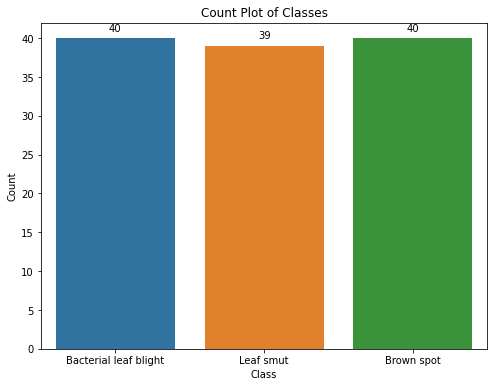

In [307]:
import seaborn as sns
plt.figure(figsize=(8, 6))
ax=sns.countplot(x=y)
plt.title('Count Plot of Classes')
plt.xlabel('Class')
plt.ylabel('Count')

# Annotate each bar with the exact count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

### Displaying Random image from data set

random  image index: 116


Text(0.5, 1.0, 'Brown spot')

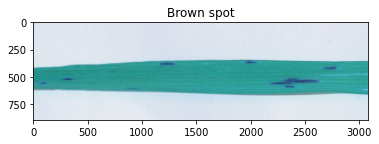

In [291]:
from random import randint
rand_index=randint(0,118)
print(f"random  image index: {rand_index}")
plt.imshow(x[rand_index])
plt.title(y[rand_index])

In [292]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/Users/munawira/06-FEB_Python/projects/Rice_Leaf/Divided_Leaf_Data/Train'
valid_path = '/Users/munawira/06-FEB_Python/projects/Rice_Leaf/Divided_Leaf_Data/Test'

In [300]:
# Use the Image Data Generator to import the augmented images from the dataset. Augmentation is done only on train data

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [301]:
# Make sure you provide the same target size as initialized for the image size of inception v3
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 95 images belonging to 3 classes.


In [320]:
training_set.class_indices

{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}

In [303]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 24 images belonging to 3 classes.


In [319]:
test_set.class_indices

{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}

### Task 2:-Create a model which can classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot.


In [293]:
# Using Transfer Learning - inception V3

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [294]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [295]:
# useful for getting number of output classes
folders = glob('/Users/munawira/06-FEB_Python/projects/Rice_Leaf/Divided_Leaf_Data/Train/*')
len(folders)

3

In [296]:
flat_inception_output = Flatten()(inception.output)

In [297]:
prediction = Dense(len(folders), activation='softmax')(flat_inception_output)

In [298]:
# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [13]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [299]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  metrics=['accuracy']
)

In [305]:
history = model.fit(
  training_set,
  steps_per_epoch=len(training_set),
  validation_data=test_set,
  validation_steps=len(test_set),
  epochs=20
  )

Epoch 1/20
3/3 [==============================] - 18s 5s/step - loss: 10.2590 - accuracy: 0.3368 - val_loss: 6.9244 - val_accuracy: 0.4167
Epoch 2/20
3/3 [==============================] - 11s 4s/step - loss: 3.9689 - accuracy: 0.5895 - val_loss: 4.3661 - val_accuracy: 0.3333
Epoch 3/20
3/3 [==============================] - 11s 4s/step - loss: 3.9041 - accuracy: 0.6211 - val_loss: 1.1862 - val_accuracy: 0.8750
Epoch 4/20
3/3 [==============================] - 11s 4s/step - loss: 0.7454 - accuracy: 0.9053 - val_loss: 1.5695 - val_accuracy: 0.8333
Epoch 5/20
3/3 [==============================] - 11s 4s/step - loss: 0.8088 - accuracy: 0.8526 - val_loss: 1.6848 - val_accuracy: 0.7917
Epoch 6/20
3/3 [==============================] - 11s 4s/step - loss: 0.6637 - accuracy: 0.9158 - val_loss: 1.1004 - val_accuracy: 0.8750
Epoch 7/20
3/3 [==============================] - 15s 5s/step - loss: 0.1394 - accuracy: 0.9368 - val_loss: 1.0363 - val_accuracy: 0.8750
Epoch 8/20
3/3 [=================

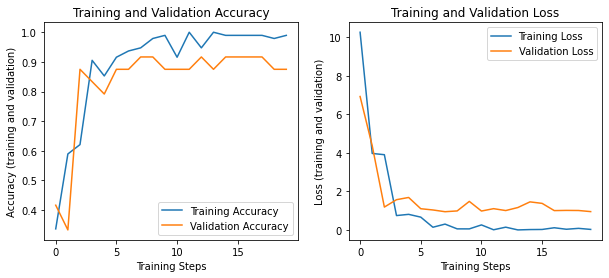

In [342]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()

In [327]:
classes=list(test_set.class_indices.keys())
classes

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

In [328]:
def load_image(filename):
    img = cv2.imread(os.path.join(valid_path, filename))
    img = cv2.resize(img, (IMAGE_SIZE[0], IMAGE_SIZE[1]) )
    img = img /255
    
    return img

In [329]:
def predict(image):
    probabilities = model.predict(np.asarray([img]))[0]
    class_idx = np.argmax(probabilities)
    
    return {classes[class_idx]: probabilities[class_idx]}

SOURCE: class: Leaf smut, file: Leaf smut/DSC_0504.jpg
1/1 [==============================] - 0s 216ms/step
PREDICTED: class: Leaf smut, confidence: 0.998551


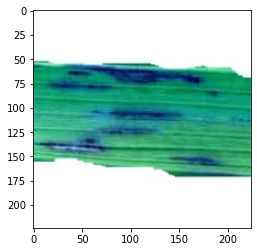

<Figure size 432x288 with 0 Axes>

SOURCE: class: Brown spot, file: Brown spot/DSC_0299.JPG
1/1 [==============================] - 0s 132ms/step
PREDICTED: class: Brown spot, confidence: 0.999998


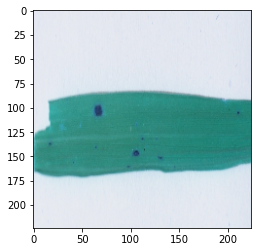

SOURCE: class: Leaf smut, file: Leaf smut/DSC_0293.JPG
1/1 [==============================] - 0s 107ms/step
PREDICTED: class: Leaf smut, confidence: 0.999064


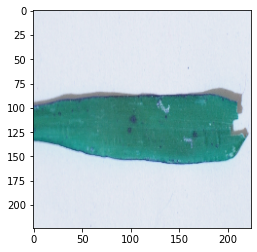

<Figure size 432x288 with 0 Axes>

SOURCE: class: Brown spot, file: Brown spot/DSC_0116.jpg
1/1 [==============================] - 0s 111ms/step
PREDICTED: class: Brown spot, confidence: 1.000000


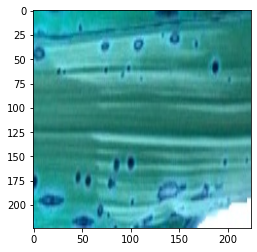

<Figure size 432x288 with 0 Axes>

SOURCE: class: Bacterial leaf blight, file: Bacterial leaf blight/DSC_0406.JPG
1/1 [==============================] - 0s 232ms/step
PREDICTED: class: Bacterial leaf blight, confidence: 1.000000


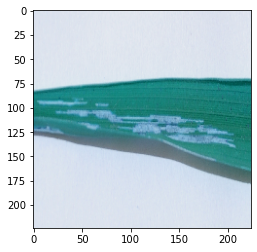

<Figure size 432x288 with 0 Axes>

In [345]:
import random
for idx, filename in enumerate(random.sample(test_set.filenames, 5)):
    print("SOURCE: class: %s, file: %s" % (os.path.split(filename)[0], filename))
    
    img = load_image(filename)
    prediction = predict(img)
    print("PREDICTED: class: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))
    plt.imshow(img)
    plt.figure(idx)    
    plt.show()

In [309]:

random.sample(test_set.filenames, 5)

['Brown spot/DSC_0101.jpg',
 'Leaf smut/DSC_0513.jpg',
 'Bacterial leaf blight/DSC_0703.JPG',
 'Leaf smut/DSC_0338.JPG',
 'Leaf smut/DSC_0316.JPG']

In [323]:
img = cv2.imread(os.path.join(valid_path, 'Brown spot/DSC_0101.jpg'))
img = cv2.resize(img, (IMAGE_SIZE[0], IMAGE_SIZE[1]) )
img = img /255

probabilities = model.predict(np.asarray([img]))[0]
probabilities

1/1 [==============================] - 0s 140ms/step


array([5.4587850e-09, 9.9987173e-01, 1.2823688e-04], dtype=float32)

In [324]:
class_idx = np.argmax(probabilities)
class_idx

1

In [325]:
prediction = {classes[class_idx]: probabilities[class_idx]}

In [326]:
prediction

{'Brown spot': 0.99987173}

### Task3:- Analyze various techniques like Data Augmentation, etc and create a report on that.


random index: 115


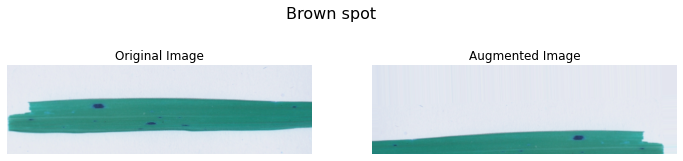

In [350]:
rand_index=randint(0,118)
random_img=x[rand_index]
print(f"random index: {rand_index}")
# Convert image to NumPy array
img_array = np.array(random_img)

# Reshape to add a batch dimension
img_array = img_array.reshape((1,) + img_array.shape)

# Create an ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate augmented image
augmented_images = datagen.flow(img_array, batch_size=1)

fig = plt.figure(figsize=(12, 3))
fig.suptitle(y[rand_index], fontsize=16)

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(random_img)
plt.title('Original Image')
plt.axis('off')

# Display the augmented image
plt.subplot(1, 2, 2)
augmented_image = augmented_images.next()[0]
plt.imshow(augmented_image)
plt.title('Augmented Image')
plt.axis('off')

# Show the plot
plt.show()